### Imports Necessary Modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


### Load the Dataset

shape of the x: (200, 2)
shape of the y: (200,)


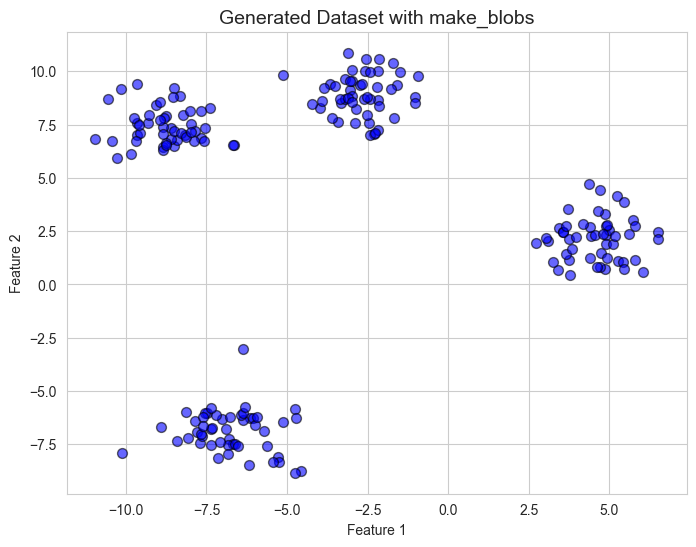

In [16]:
X, y = make_blobs(n_samples=200,centers=4,random_state=42)

print(f"shape of the x: {X.shape}")
print(f"shape of the y: {y.shape}")


# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', s=50, alpha=0.6, edgecolors='k')
plt.title("Generated Dataset with make_blobs", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Train the model

In [18]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=42)
kmeans.fit(X)

# Displays coordinates of each cluster's centroid (mean position).
print("Cluster centers:\n", kmeans.cluster_centers_) 
# Shows cluster assignments for the first 10 data points. 
print("Labels:\n", kmeans.labels_[:10])      
# Shows total within-cluster sum(wcss) of squared distances.(low_inertia-> points are closer to their centroid → tighter clusters)         
print("Inertia:", kmeans.inertia_)         
# Shows number of iterations run until convergence.            
print("Iterations taken:", kmeans.n_iter_)             



Cluster centers:
 [[ 4.58407676  2.1431444 ]
 [-2.70146566  8.90287872]
 [-6.75399588 -6.88944874]
 [-8.74950999  7.40771124]]
Labels:
 [0 1 3 3 2 2 0 3 0 2]
Inertia: 362.9231865734264
Iterations taken: 2


### visualize

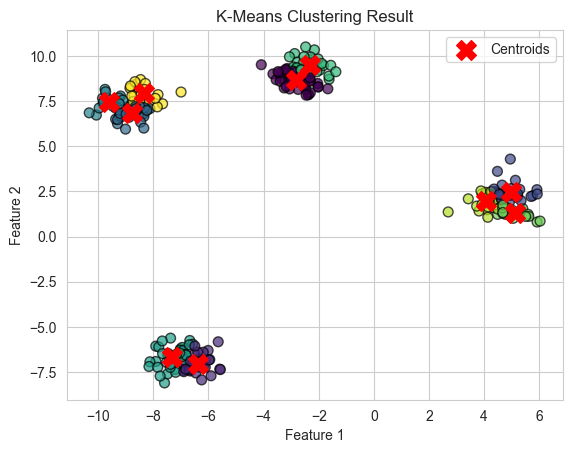

In [38]:
y_kmeans = kmeans.labels_
centers = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', edgecolor='k', alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.title("K-Means Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


### Elbow Method for finding optimal K

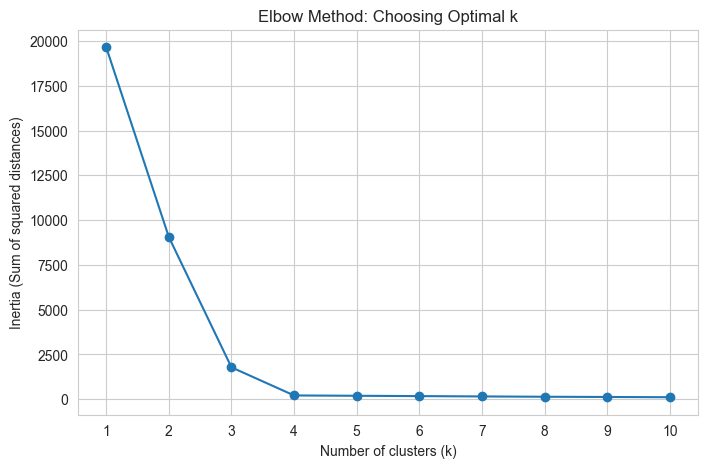

In [45]:
inertia_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, max_iter=300)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)

# Plot k vs inertia
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_list, marker='o')
plt.title('Elbow Method: Choosing Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

### k-means with other dataset

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.cluster import KMeans

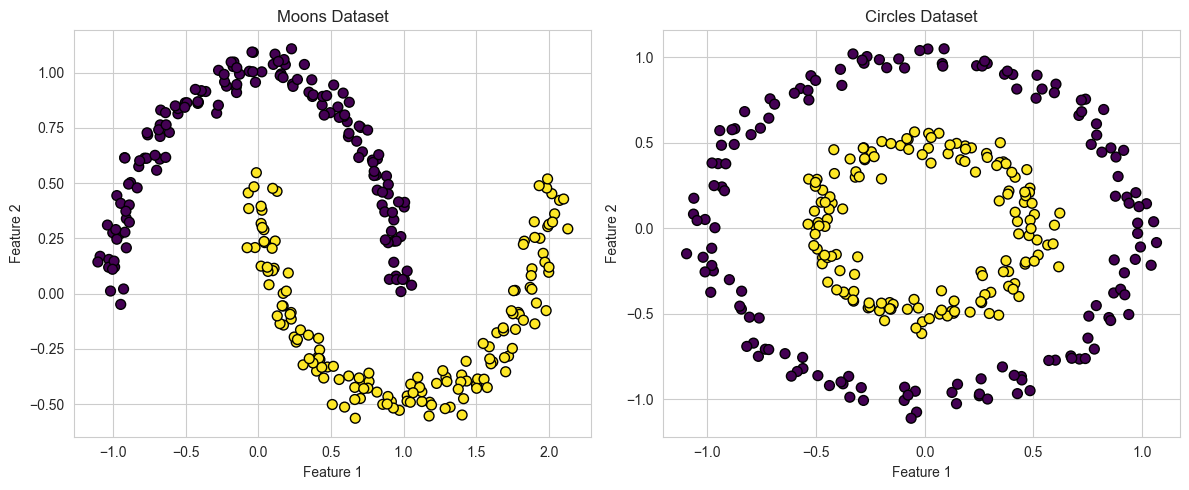

In [42]:
# Generate datasets
X_moons, y_moons = make_moons(n_samples=300, noise=0.05, random_state=42)
X_circles, y_circles = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)

# Plot the datasets
plt.figure(figsize=(12, 5))

# Plot moons dataset 
plt.subplot(1, 2, 1)  
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis', s=50, edgecolor='k')
plt.title('Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot circles dataset 
plt.subplot(1, 2, 2) 
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap='viridis', s=50, edgecolor='k')
plt.title('Circles Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

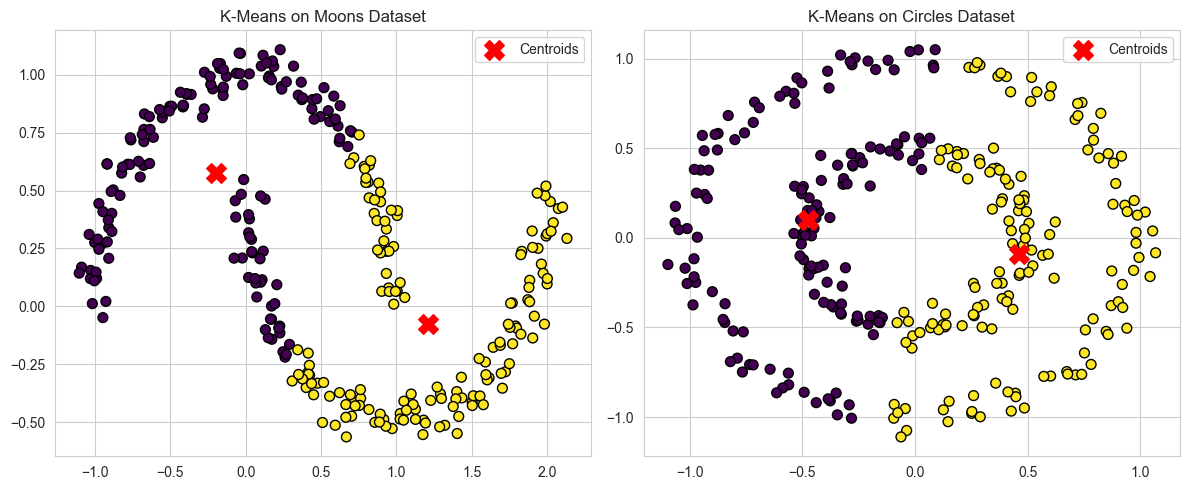

In [48]:
# Apply KMeans
kmeans_moons = KMeans(n_clusters=2, init='k-means++', random_state=42, max_iter=300)
y_kmeans_moons = kmeans_moons.fit_predict(X_moons)

kmeans_circles = KMeans(n_clusters=2, init='k-means++', random_state=42, max_iter=300)
y_kmeans_circles = kmeans_circles.fit_predict(X_circles)

# Plot the result
plt.figure(figsize=(12, 5))

# Moons subplot
plt.subplot(1, 2, 1)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_kmeans_moons, cmap='viridis', s=50, edgecolor='k')
plt.scatter(kmeans_moons.cluster_centers_[:, 0], kmeans_moons.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('K-Means on Moons Dataset')
plt.legend()

# Circles subplot
plt.subplot(1, 2, 2)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_kmeans_circles, cmap='viridis', s=50, edgecolor='k')
plt.scatter(kmeans_circles.cluster_centers_[:, 0], kmeans_circles.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('K-Means on Circles Dataset')
plt.legend()

plt.tight_layout()
plt.show()